In [16]:
import pandas as pd

In [1]:
pwd()

'c:\\Users\\ArthurBOND\\common-tools\\Daily Data\\scripts\\python'

In [17]:
outage_data = pd.read_csv("./outages.csv",index_col=0)

df_map = pd.read_csv("./data/duid_map_july_2024.csv")
dfmap = df_map.to_dict()
df_map = dict(zip(dfmap['DUID'].values(),dfmap['REGION'].values()))

outage_data['Region'] = outage_data.index.map(df_map)

In [18]:
# Group by 'Region' and create separate DataFrames
dfs = {key: group for key, group in outage_data.groupby('Region')}

# Access individual DataFrames
for df in dfs.keys():
    print(dfs.get(df))


                outage_start           outage_end current_status  \
duid                                                               
GSTONE4  2025-02-07 22:25:00  2025-02-26 11:35:00        ONGOING   

         mw_5min_prev  actual_mw  target_mw  max_ramp_rate  \
duid                                                         
GSTONE4       7.31836        0.0    2.31836             57   

         registeredcapacity         bidofferdate bidsettlementdate  \
duid                                                                 
GSTONE4               280.0  2025-02-07 22:17:07        2025-02-07   

                                rebidexplanation rebid_category  os_pasaavail  \
duid                                                                            
GSTONE4  Unit commitment-Rebid to match Scada-SL              P             0   

           os_pasaunitstate  latest_pasaavail latest_pasaunitstate  \
duid                                                                 
GSTONE4  OUTA

## Get GenInfo

In [19]:
import os

def get_geninfo(duids):
    '''Load the latest gen info (coal unit names and capacities).'''
    
    # check for latest gen info file
    file_path = "./data/geninfo/"
    #file_path = os.path.abspath(os.path.join(os.path.dirname( __file__ ), '../..', 'data','geninfo')) ##
    geninfo_files = [file for file in os.listdir(file_path) if "geninfo" in file]
    geninfo_files.sort()
    latest_geninfo = geninfo_files[-1]
    
    # load file
    geninfo = pd.read_excel(
        os.path.join(file_path, latest_geninfo),
        sheet_name=4,
        skiprows=1,
        skipfooter=6,
        usecols=["Site Name", "DUID", "Upper Nameplate Capacity (MW)"],
        index_col="DUID"
    )
    geninfo = geninfo.loc[duids]
    geninfo.columns = ["name", "capacity"]
    # clean unit names
    geninfo["name"] = geninfo.index.map(lambda duid: f"{geninfo.at[duid, 'name'].replace(' Power Station', '').replace(' Power Plant', '')} {duid[-1]}")
    
    return geninfo

# DUIDs for queries and matching other information
coal_duids = ['BW01', 'BW02', 'BW03', 'BW04', 'CALL_B_1',
    'CALL_B_2', 'CPP_3', 'CPP_4', 'ER01', 'ER02',
    'ER03', 'ER04', 'GSTONE1', 'GSTONE2', 'GSTONE3',
    'GSTONE4', 'GSTONE5', 'GSTONE6', 'KPP_1', 'LYA1',
    'LYA2', 'LYA3', 'LYA4', 'LOYYB1', 'LOYYB2',
    'MPP_1', 'MPP_2', 'MP1', 'MP2', 'STAN-1',
    'STAN-2', 'STAN-3', 'STAN-4', 'TARONG#1', 'TARONG#2',
    'TARONG#3', 'TARONG#4', 'TNPS1', 'VP5', 'VP6',
    'YWPS1', 'YWPS2', 'YWPS3', 'YWPS4']


geninfo = get_geninfo(coal_duids)

## Writing to outage_template

In [20]:
from openpyxl import load_workbook
from copy import copy

In [21]:
for duid in current_outages.index:
    print(duid)

GSTONE4


In [22]:
pd.to_datetime("today").date()

datetime.date(2025, 3, 7)

In [23]:
dfs['QLD']

,outage_start,outage_end,current_status,mw_5min_prev,actual_mw,target_mw,max_ramp_rate,registeredcapacity,bidofferdate,bidsettlementdate,rebidexplanation,rebid_category,os_pasaavail,os_pasaunitstate,latest_pasaavail,latest_pasaunitstate,expected_return,latest_offer_datetime,Region
duid,,,,,,,,,,,,,,,,,,,
GSTONE4,2025-02-07 22:25:00,2025-02-26 11:35:00,ONGOING,7.31836,0.0,2.31836,57,280.0,2025-02-07 22:17:07,2025-02-07,Unit commitment-Rebid to match Scada-SL,P,0,OUTAGEUNPLANFORCED,280,NODERATINGS,2025-03-02,2025-02-23 00:01:17,QLD


In [24]:
outage_data

,outage_start,outage_end,current_status,mw_5min_prev,actual_mw,target_mw,max_ramp_rate,registeredcapacity,bidofferdate,bidsettlementdate,rebidexplanation,rebid_category,os_pasaavail,os_pasaunitstate,latest_pasaavail,latest_pasaunitstate,expected_return,latest_offer_datetime,Region
duid,,,,,,,,,,,,,,,,,,,
GSTONE4,2025-02-07 22:25:00,2025-02-26 11:35:00,ONGOING,7.31836,0.0,2.31836,57,280.0,2025-02-07 22:17:07,2025-02-07,Unit commitment-Rebid to match Scada-SL,P,0,OUTAGEUNPLANFORCED,280,NODERATINGS,2025-03-02,2025-02-23 00:01:17,QLD
LYA4,2025-02-15 20:05:00,2025-02-26 11:35:00,ONGOING,70.00000,0.0,55.00000,116,560.0,2025-02-14 19:57:01,2025-02-15,050 Chg in unit operation~Cooldown profile,P,530,NODERATINGS,530,NODERATINGS,2025-03-02,2025-02-21 15:03:47,VIC
YWPS1,2025-02-24 04:45:00,2025-02-26 11:35:00,ONGOING,23.75000,0.5,8.84375,79,360.0,2025-02-24 04:37:34,2025-02-24,Adj avail PASA unit trip SL,NaN,320,NODERATINGS,320,NODERATINGS,2025-03-02,2025-02-13 11:29:22,VIC


In [25]:
today = pd.to_datetime('2025-02-26')

def do_thing(outage_data):
    # identify units that are out on day of reporting
    # include any DUID listed with 'M'
    current_duids = outage_data[outage_data["current_status"] == "ONGOING"].index
    returning_duids = outage_data[outage_data["current_status"] == "RETURNING"].index
    # coal outage classified as 'New' not 'Existing' if outage started after yesterday at 10 am
    outage_starts = outage_data["outage_start"].to_list()
    new_duids = [outage_data.index[i] for i in range(len(outage_data.index)) if pd.Timestamp(outage_starts[i]) >= today - pd.DateOffset(hours=14)]

    # prepare current outages table
    current_outages = pd.DataFrame(
        columns=["name", "capacity", "outage_type", "outage_date", "existing", "expected_return"],
        index=current_duids
    )
    current_outages.index.name = "duid"

    # prepare return-to-service table
    return_to_service = pd.DataFrame(
        columns=["name", "capacity", "outage_date", "days_unavailable"],
        index=returning_duids
    )
    return_to_service.index.name = "duid"

    # populate tables

    # gather basic outage info
    for duid in current_outages.index:
        name = geninfo.at[duid, "name"]
        capacity = geninfo.at[duid, "capacity"]
        outage_start = pd.to_datetime(outage_data.at[duid, "outage_start"]).date()
        expected_return = pd.to_datetime(outage_data.at[duid, "expected_return"]).date()
        existing = False if duid in new_duids else True
        current_outages.loc[duid] = [name, capacity, pd.NA, outage_start, existing, expected_return]
    for duid in return_to_service.index:
        name = geninfo.at[duid, "name"]
        capacity = geninfo.at[duid, "capacity"]
        days_unavailable = (outage_data.at[duid, "outage_end"] - outage_data.at[duid, "outage_start"]).days + 1
        outage_start = outage_data.at[duid, "outage_start"].date()
        return_to_service.loc[duid] = [name, capacity, outage_start, days_unavailable]

    return current_duids, current_outages, return_to_service

qld_df = dfs['QLD'].copy()

current_outages = do_thing(qld_df)

print(current_outages)

(Index(['GSTONE4'], dtype='object', name='duid'),                 name capacity outage_type outage_date existing expected_return
duid                                                                          
GSTONE4  Gladstone 4    280.0        <NA>  2025-02-07     True      2025-03-02, Empty DataFrame
Columns: [name, capacity, outage_date, days_unavailable]
Index: [])


In [26]:

def diagnose_outage(duid, outage_data):
    '''Applies logic to the DUID's diagnostic data to classify the outage as 'Planned',
    'Unplanned' or 'Unclear'.'''

    # set threshold
    outage_threshold = 5
    # check unit state
    unit_state = outage_data.at[duid, "os_pasaunitstate"]
    if ("UNPLAN" in unit_state) | ("FORCE" in unit_state):
        print(f"{duid}: Unit state is {unit_state} at time of outage. Outage is unplanned.")
        return "Unplanned"
    if unit_state == "INACTIVERESERVE":
        print(f"{duid}: Unit state is INACTIVERESERVE at time of outage. Outage is planned.")
        return "Planned"
    # check rampdown rate for a trip
    actual_mw = float(outage_data.at[duid, "actual_mw"])
    prior_mw = float(outage_data.at[duid, "mw_5min_prev"])
    rampdown_rate = (prior_mw - actual_mw) / 5
    max_rampdown_rate = outage_data.at[duid, "max_ramp_rate"]
    if rampdown_rate > max_rampdown_rate:
        print(f"{duid}: Unit ramped down at unsafe speed. Outage is likely unplanned.")
        return "Unplanned"
    # check pasa_availability, which indicates planned outages
    pasaavail = float(outage_data.at[duid, "os_pasaavail"])
    if pasaavail < outage_threshold:
        print(f"{duid}: PASA availability is (near) zero at time of outage. Outage is likely planned.")
        return "Planned"
    # check target MW versus actual MW
    target_mw = outage_data.at[duid, "target_mw"]
    if pd.notna(target_mw):
        target_mw = float(target_mw)
        output_diff = float(target_mw - actual_mw)
        if output_diff > max_rampdown_rate:
            print(f"{duid}: Power is {output_diff:,.0f}MW below target at time of outage. Outage is likely unplanned.")
            return "Unplanned"
    # verify whether diagnostic data exists
    bidding_data = pd.notna(outage_data.at[duid, "bidofferdate"])
    if bidding_data:
        # check reason/explanation field
        reason = outage_data.at[duid, "rebidexplanation"].lower()
        if ("trip" in reason) | ("leak" in reason) | ("fault" in reason) | ("fail" in reason) | ("unexpect" in reason):
            print(f"{duid}: Reason field suggests a failure. Outage is likely unplanned.")
            return "Unplanned"
        unit_state_now = outage_data.at[duid, "latest_pasaunitstate"]
        if pd.notna(unit_state_now):
            if ("UNPLAN" in unit_state_now) | ("FORCE" in unit_state_now):
                print(f"{duid}: The original unit state was {unit_state} but it is now {unit_state_now}. Outage is unplanned.")
                return "Unplanned"
            if ("PLAN" in unit_state_now) & ("UNPLAN" not in unit_state_now):
                print(f"{duid}: The original unit state was {unit_state} but it is now {unit_state_now}. Outage is likely planned.")
                return "Planned"
    # final check if target MW indicates planned shutdown
    if pd.notna(target_mw):
        if target_mw < outage_threshold * 3:
            print(f"{duid}: Target output is very low ({target_mw:,.0f}MW) at time of outage. Outage is likely planned.")
            return "Planned"
    # return 'unclear' if outage remains undefined
    print(f"{duid}: The outage was unable to be classified automatically. PASA availability is above zero, ramp-down was safe and other checks were inconclusive. Outage type is unclear.")
    
    return "Unclear"

In [60]:
# WRITING TO EXCEL

template_name = "./outage_report_template_v2.xlsx"
excel_workbook = load_workbook(template_name)
worksheet = excel_workbook.active

In [61]:
worksheet["B8"] = f"Coal units detected generating no power on {today:%#d %B %Y}:"

# excel_workbook.save("test.xlsx")
# sort outages by new first, then name

outage_data_copy = outage_data.copy()

# fill in table

print(dfs.keys())

# loop through 5 regions
row_no = 10 # regions start at B10
for _ in range(5):
    region =  worksheet[f"B{row_no}"].value

    
    print("Region loop:",row_no)

    
    print(worksheet[f"B{row_no}"].value)
    print(worksheet[f"B{row_no+1}"].value)
    print(worksheet[f"B{row_no+2}"].value)

    # row_no += 1


    if region in dfs.keys():

        print(region)

        # print(dfs[region])

        current_duids,current_outages,return_to_service = do_thing(dfs[region])

        for duid in current_duids:
            outage_type = diagnose_outage(duid, outage_data)
            current_outages.at[duid, "outage_type"] = outage_type

        # print(current_outages)

        current_outages.sort_values(["existing", "name"], inplace=True)

        # Loop through 
        row_no += 1

        print("Found a region: ",row_no)

        print(current_outages)

        # print(outage_data)
        
        for i, duid in enumerate(current_outages.index):
            # insert line if required
            worksheet.insert_rows(row_no)
            worksheet.row_dimensions[row_no].height = worksheet.row_dimensions[10].height
            # copy style/formatting to new cells
            for col in range(7):
                column = chr(ord("C") + col) # clever way to iterate to next letter
                target_cell = worksheet[f"{column}{row_no}"]
                source_cell = worksheet[f"{column}10"]
                target_cell.font = copy(source_cell.font)
                target_cell.border = copy(source_cell.border)
                target_cell.fill = copy(source_cell.fill)
                target_cell.number_format = copy(source_cell.number_format)
                target_cell.alignment = copy(source_cell.alignment)

            # print(i,duid)
            # insert data into cells
            outage_date = current_outages.at[duid, "outage_date"]
            existing = current_outages.at[duid, "existing"]
            outage_type = current_outages.at[duid, "outage_type"]
            outage_days = (today - pd.to_datetime(outage_date)).days
            return_date = current_outages.at[duid, "expected_return"]
            # print(return_date,type(return_date))
            # print(today,type(today))
            if (return_date < today.date()) | ((not existing) & (return_date == today.date())):
                return_date = "Unknown"        
            worksheet[f"C{row_no}"] = geninfo.at[duid, "name"]
            worksheet[f"D{row_no}"] = "Existing" if current_outages.at[duid, "existing"] else "New"
            worksheet[f"E{row_no}"] = int(geninfo.at[duid, "capacity"])
            worksheet[f"F{row_no}"] = outage_type
            worksheet[f"G{row_no}"] = outage_days if outage_days > 0 else "New outage"
            worksheet[f"H{row_no}"] = return_date
            worksheet[f"I{row_no}"] = "Unknown" if return_date == "Unknown" else (return_date - today.date()).days

            row_no +=1

            print("Added a generator: ",row_no)

    else:
        row_no += 2

        print("Moved to next region: ",row_no)


# fill in today's total outages
return_to_service_row = 18 + max(1, len(current_duids))
# total planned
worksheet[f"D{return_to_service_row - 8}"] = current_outages[current_outages["outage_type"] == "Planned"]["capacity"].sum()
# total unplanned
worksheet[f"D{return_to_service_row - 7}"] = current_outages[current_outages["outage_type"] == "Unplanned"]["capacity"].sum()
# total unclear
worksheet[f"D{return_to_service_row - 6}"] = current_outages[current_outages["outage_type"] == "Unclear"]["capacity"].sum()
# total outages
worksheet[f"D{return_to_service_row - 5}"] = current_outages["capacity"].sum()

file_name = f"./final_final_outages_{today:%Y%m%d}.xlsx"
excel_workbook.save(file_name)

dict_keys(['QLD', 'VIC'])
Region loop: 10
NSW
None
QLD
Moved to next region:  12
Region loop: 12
QLD
None
SA
QLD
GSTONE4: Unit state is OUTAGEUNPLANFORCED at time of outage. Outage is unplanned.
Found a region:  13
                name capacity outage_type outage_date existing expected_return
duid                                                                          
GSTONE4  Gladstone 4    280.0   Unplanned  2025-02-07     True      2025-03-02
Added a generator:  14
Region loop: 14
None
SA
None
Moved to next region:  16
Region loop: 16
None
VIC
None
Moved to next region:  18
Region loop: 18
None
TAS
None
Moved to next region:  20


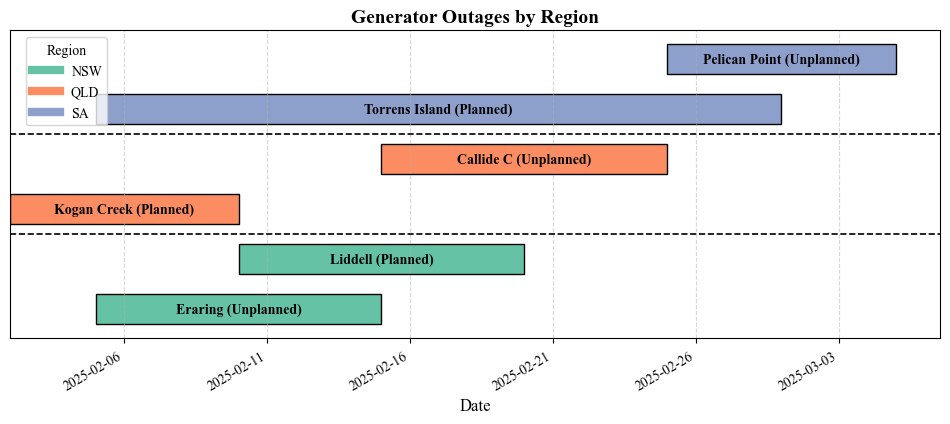

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams["font.family"] = "Times New Roman"

# Example DataFrame
data = {
    "Generator": ["Kogan Creek", "Eraring", "Liddell", "Callide C", "Torrens Island", "Pelican Point"],
    "Region": ["QLD", "NSW", "NSW", "QLD", "SA", "SA"],
    "Start Date": pd.to_datetime(["2025-02-02", "2025-02-05", "2025-02-10", "2025-02-15", "2025-02-05", "2025-02-25"]),
    "End Date": pd.to_datetime(["2025-02-10", "2025-02-15", "2025-02-20", "2025-02-25", "2025-03-01", "2025-03-05"]),
    "Type": ["Planned", "Unplanned", "Planned", "Unplanned", "Planned", "Unplanned"]
}

df = pd.DataFrame(data)

# Sort by region first, then by start date
df.sort_values(by=["Region", "Start Date"], inplace=True)

# Assign unique indices for better region separation
df["y_pos"] = range(len(df))

# Set up the figure
plt.figure(figsize=(12, 4))
ax = plt.gca()

# Define colors by region
palette = sns.color_palette("Set2", n_colors=df["Region"].nunique())
region_colors = dict(zip(df["Region"].unique(), palette))

# Plot horizontal bars with start and end dates, thinner bars
for i, row in df.iterrows():
    ax.barh(
        y=row["y_pos"], 
        width=(row["End Date"] - row["Start Date"]).days, 
        left=row["Start Date"], 
        height=0.6,  # Reduced bar height for closer spacing
        color=region_colors[row["Region"]],
        edgecolor="black"
    )
    # Add labels inside the bars
    ax.text(
        row["Start Date"] + (row["End Date"] - row["Start Date"]) / 2,  # Center label
        row["y_pos"],
        f"{row['Generator']} ({row['Type']})",
        va="center",
        ha="center",
        fontsize=10,
        color="black",
        fontweight="bold"
    )

# Add dashed separators between regions
region_breaks = df.groupby("Region")["y_pos"].last().values[:-1]  # Get last index of each region
for y in region_breaks:
    ax.axhline(y=y + 0.5, color="black", linestyle="dashed", linewidth=1.2)

# Format x-axis as dates
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Major ticks every 5 days
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))  # Format as YYYY-MM-DD
plt.xticks(rotation=30, ha="right", fontsize=10)  # Rotate for readability

# Remove y-axis labels since bars are annotated
plt.yticks([])  
plt.ylabel("")

# Labels and title
plt.xlabel("Date", fontsize=12)
plt.title("Generator Outages by Region", fontsize=14, fontweight="bold")

# Legend
handles = [plt.Line2D([0], [0], color=color, lw=6) for color in region_colors.values()]
plt.legend(handles, region_colors.keys(), title="Region", bbox_to_anchor=(0.01, 1), loc="upper left")

plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()


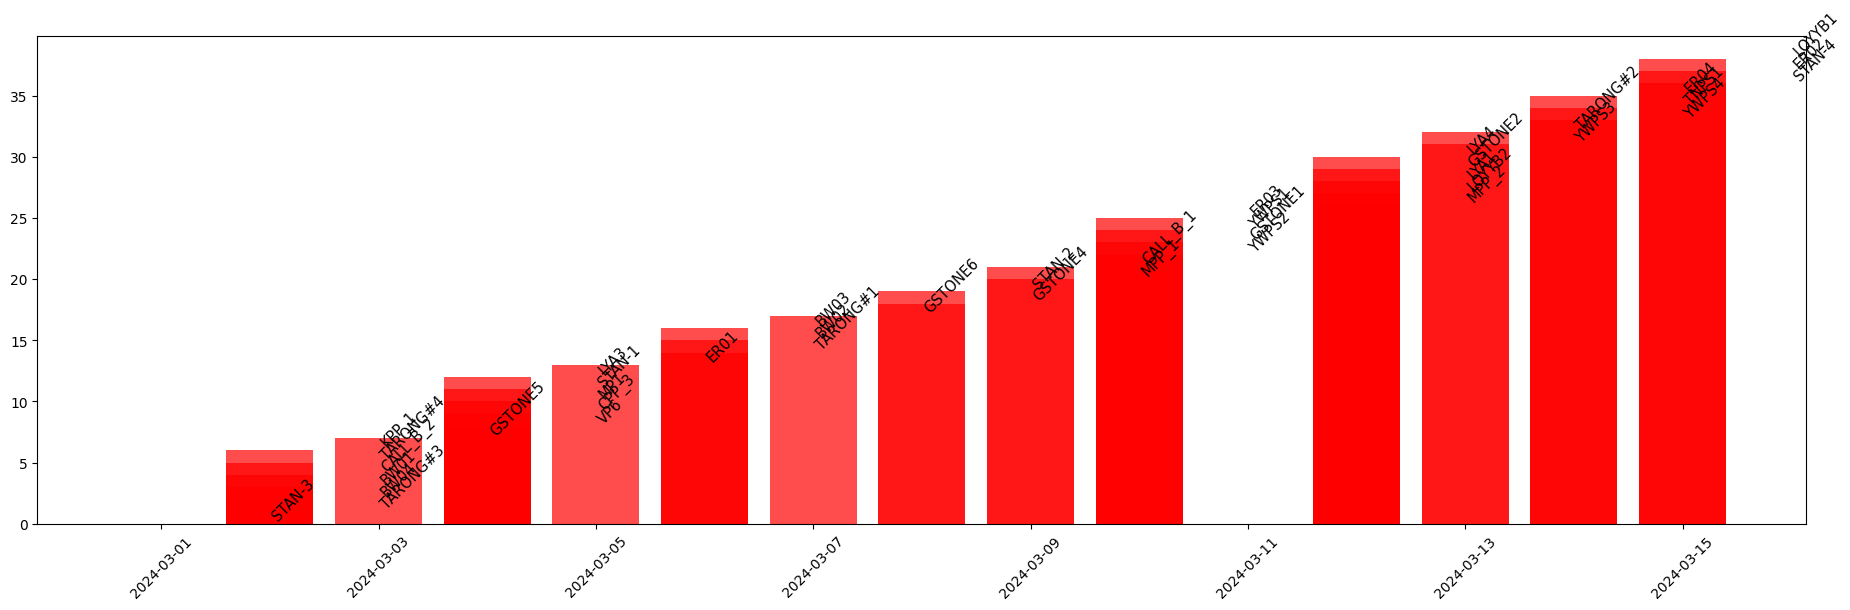

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Coal unit outages (max possible)
coal_units = [
    'BW01', 'BW02', 'BW03', 'BW04', 'CALL_B_1', 'CALL_B_2', 'CPP_3', 'CPP_4',
    'ER01', 'ER02', 'ER03', 'ER04', 'GSTONE1', 'GSTONE2', 'GSTONE3', 'GSTONE4',
    'GSTONE5', 'GSTONE6', 'KPP_1', 'LYA1', 'LYA2', 'LYA3', 'LYA4', 'LOYYB1',
    'LOYYB2', 'MPP_1', 'MPP_2', 'MP1', 'MP2', 'STAN-1', 'STAN-2', 'STAN-3',
    'STAN-4', 'TARONG#1', 'TARONG#2', 'TARONG#3', 'TARONG#4', 'TNPS1', 'VP5',
    'VP6', 'YWPS1', 'YWPS2', 'YWPS3', 'YWPS4'
]

# Sample outage data (Randomized for example)
np.random.seed(42)
num_outages = np.random.randint(1, len(coal_units) + 1)  # Random outages count
outage_units = np.random.choice(coal_units, size=num_outages, replace=False)
start_date = pd.Timestamp("2024-03-01")
end_date = pd.Timestamp("2024-03-15")
date_range = pd.date_range(start_date, end_date, freq="D")
outage_dates = np.random.choice(date_range, size=num_outages, replace=True)

# Sort data for better visualization
outages = sorted(zip(outage_dates, outage_units), key=lambda x: x[0])
dates, units = zip(*outages)

# Determine figure width dynamically
min_width = 8
max_width = 20
fig_width = min_width + (num_outages / len(coal_units)) * (max_width - min_width)

# Create figure with a fixed 12:4 aspect ratio
fig_height = fig_width * (4 / 12)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Plot outages as bars
ax.bar(dates, np.arange(len(dates)), label="Outages", color='red', alpha=0.7)

# Adjust tick spacing based on the number of days in range
num_days = (end_date - start_date).days
if num_days <= 10:
    locator = mdates.DayLocator(interval=1)
elif num_days <= 30:
    locator = mdates.DayLocator(interval=2)
else:
    locator = mdates.DayLocator(interval=5)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Dynamic font size for annotations (scales with outages, min 10)
max_font_size = 14
min_font_size = 10
font_size = max(min_font_size, max_font_size - (num_outages / len(coal_units)) * (max_font_size - min_font_size))

# Annotate each outage with variable positioning
for i, (date, unit) in enumerate(outages):
    bar_height = i
    text_x = date  # Default: inside the bar
    text_y = bar_height

    # If the bar is too short, place the label beside the bar
    if num_outages > 30:  # If too many, move text outside
        text_x += pd.Timedelta(days=1)
        ha = "left"
    else:
        ha = "center"

    ax.text(text_x, text_y, unit, fontsize=font_size, ha=ha, va="bottom", rotation=45)

# Improve layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd

# Example outage data
data = {
    "generator_name": ["A", "A", "A", "A", "B", "B", "B", "C", "C", "C", "C", "C"],
    "date": pd.to_datetime([
        "2024-03-01", "2024-03-02", "2024-03-05", "2024-03-06",  # A has 2 separate outages
        "2024-03-01", "2024-03-02", "2024-03-03",  # B has 1 outage
        "2024-03-02", "2024-03-03", "2024-03-04", "2024-03-06", "2024-03-07"  # C has 2 separate outages
    ]),
    "availability": [0] * 12  # All are outages
}

df = pd.DataFrame(data)

# Ensure data is sorted
df = df.sort_values(["generator_name", "date"])

# Identify breaks in consecutive dates using `cumsum()`
df["group"] = df.groupby("generator_name")["date"].diff().dt.days.ne(1).cumsum()

# Aggregate start and end date of each outage period
outage_periods = df.groupby(["generator_name", "group"]).agg(
    start_date=("date", "min"),
    end_date=("date", "max")
).reset_index(drop=False)

print(outage_periods)


  generator_name  group start_date   end_date
0              A      1 2024-03-01 2024-03-02
1              A      2 2024-03-05 2024-03-06
2              B      3 2024-03-01 2024-03-03
3              C      4 2024-03-02 2024-03-04
4              C      5 2024-03-06 2024-03-07


In [4]:
df.groupby("generator_name")["date"].diff().dt.days.ne(1)


0      True
1     False
2      True
3     False
4      True
5     False
6     False
7      True
8     False
9     False
10     True
11    False
Name: date, dtype: bool